In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
from skimage import data

In [2]:
df = pd.read_csv('sample.csv')

In [3]:
df

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,...,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,...,Not owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,53.0,No co-applicant,No co-applicant,No co-applicant,Erie County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,69000.0,108,2053.0,821.0,33.580002,4416.0
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Not Hispanic or Latino,White,Female,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,No co-applicant,No co-applicant,No co-applicant,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,No co-applicant,No co-applicant,No co-applicant,Steuben County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175857,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,118.0,No co-applicant,No co-applicant,No co-applicant,Nassau County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Affiliate institution,109000.0,300,1470.0,1337.0,17.110001,4448.0
175858,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Female,27.0,No co-applicant,No co-applicant,No co-applicant,Monroe County,...,Owner-occupied as a principal dwelling,Preapproval was not requested,One-to-four family dwelling (other than manufa...,"Life insurance company, credit union, mortgage...",69700.0,88,1719.0,1490.0,16.040001,4658.0
175859,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,215.0,Not Hispanic or Latino,White,Female,Nassau County,...,Owner-occupied as a principal dwelling,Preapproval was not requested,One-to-four family dwelling (other than manufa...,Fannie Mae (FNMA),109000.0,205,1547.0,1455.0,7.730000,4671.0
175860,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,116.0,No co-applicant,No co-applicant,No co-applicant,Rockland County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Freddie Mac (FHLMC),71300.0,200,1743.0,1534.0,19.969999,5484.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175862 entries, 0 to 175861
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken_name               175862 non-null  object 
 1   agency_name                     175862 non-null  object 
 2   applicant_ethnicity_name        175862 non-null  object 
 3   applicant_race_name_1           175862 non-null  object 
 4   applicant_sex_name              175862 non-null  object 
 5   applicant_income_000s           151344 non-null  float64
 6   co_applicant_ethnicity_name     175862 non-null  object 
 7   co_applicant_race_name_1        175862 non-null  object 
 8   co_applicant_sex_name           175862 non-null  object 
 9   county_name                     175377 non-null  object 
 10  denial_reason_name_1            23067 non-null   object 
 11  denial_reason_name_2            4650 non-null    object 
 12  denial_reason_na

In [62]:
df.applicant_ethnicity_name.unique()

# Why is the information whether an applicant is "Hispanic or Latino" so important for the application process?
# Why is the ethnicity / race so important at all? Are there statistics about loan default rates according to ethnicity?

array(['Not Hispanic or Latino', 'Not applicable', 'Hispanic or Latino',
       'Information not provided by applicant in mail, Internet, or telephone application'],
      dtype=object)

In [5]:
null_df = pd.DataFrame({'Null_Values': df.isna().sum().sort_values(ascending = False), 'Percentage': round((df.isna().sum())/(df.shape[0])*(100),2)})
null_df

,Null_Values,Percentage
action_taken_name,0,0.00
agency_name,0,0.00
applicant_ethnicity_name,0,0.00
applicant_income_000s,24518,13.94
applicant_race_name_1,0,0.00
applicant_sex_name,0,0.00
co_applicant_ethnicity_name,0,0.00
co_applicant_race_name_1,0,0.00
co_applicant_sex_name,0,0.00
county_name,485,0.28


In [6]:
df.columns

Index(['action_taken_name', 'agency_name', 'applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s',
       'co_applicant_ethnicity_name', 'co_applicant_race_name_1',
       'co_applicant_sex_name', 'county_name', 'denial_reason_name_1',
       'denial_reason_name_2', 'denial_reason_name_3', 'hoepa_status_name',
       'lien_status_name', 'loan_purpose_name', 'loan_type_name', 'msamd_name',
       'owner_occupancy_name', 'preapproval_name', 'property_type_name',
       'purchaser_type_name', 'hud_median_family_income', 'loan_amount_000s',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'minority_population', 'population'],
      dtype='object')

In [ ]:
if df.action_taken_name == 

In [122]:
denial_reasons = pd.DataFrame({'reason_1': sorted(df[df.denial_reason_name_1.isnull() == False]['denial_reason_name_1'].unique()), 
                               'reason_1_count': sorted(df[df.denial_reason_name_1.isnull() == False]['denial_reason_name_1'].value_counts()),
                               'reason_2': sorted(df[df.denial_reason_name_2.isnull() == False]['denial_reason_name_2'].unique()),
                               'reason_2_count': sorted(df[df.denial_reason_name_2.isnull() == False]['denial_reason_name_2'].value_counts()),
                               'reason_3': sorted(df[df.denial_reason_name_3.isnull() == False]['denial_reason_name_3'].unique()),
                               'reason_3_count': sorted(df[df.denial_reason_name_3.isnull() == False]['denial_reason_name_3'].value_counts()),
                               'total': denial_reasons.reason_1_count + denial_reasons.reason_2_count + denial_reasons.reason_3_count})
denial_reasons

# The reasons options are redundand, but the bank clerk doesn't have to fill them in as the null value rates show.

,reason_1,reason_1_count,reason_2,reason_2_count,reason_3,reason_3_count,total
0,Collateral,51,Collateral,26,Collateral,5,82
1,Credit application incomplete,260,Credit application incomplete,203,Credit application incomplete,16,479
2,Credit history,559,Credit history,228,Credit history,34,821
3,Debt-to-income ratio,804,Debt-to-income ratio,332,Debt-to-income ratio,64,1200
4,Employment history,2068,Employment history,513,Employment history,113,2694
5,"Insufficient cash (downpayment, closing costs)",2855,"Insufficient cash (downpayment, closing costs)",537,"Insufficient cash (downpayment, closing costs)",117,3509
6,Mortgage insurance denied,4524,Mortgage insurance denied,761,Mortgage insurance denied,134,5419
7,Other,5544,Other,935,Other,166,6645
8,Unverifiable information,6402,Unverifiable information,1115,Unverifiable information,271,7788


In [113]:
df.denial_reason_name_1.unique()

array(['Collateral', nan, 'Debt-to-income ratio', 'Credit history',
       'Employment history', 'Other',
       'Insufficient cash (downpayment, closing costs)',
       'Credit application incomplete', 'Unverifiable information',
       'Mortgage insurance denied'], dtype=object)

In [105]:
d_reasons = sorted(df[df.denial_reason_name_1.isnull() == False]['denial_reason_name_1'].unique())
d_reasons

['Collateral',
 'Credit application incomplete',
 'Credit history',
 'Debt-to-income ratio',
 'Employment history',
 'Insufficient cash (downpayment, closing costs)',
 'Mortgage insurance denied',
 'Other',
 'Unverifiable information']

In [99]:
df[df.denial_reason_name_1 == 'Collateral']['denial_reason_name_1'].count() + df[df.denial_reason_name_2 == 'Collateral']['denial_reason_name_2'].count() + df[df.denial_reason_name_3 == 'Collateral']['denial_reason_name_3'].count()

4524

In [98]:
df[df.denial_reason_name_1 == 'Collateral']['denial_reason_name_1'].count() + df[df.denial_reason_name_2 == 'Collateral']['denial_reason_name_2'].count() + df[df.denial_reason_name_3 == 'Collateral']['denial_reason_name_3'].count()

5174

<AxesSubplot:>

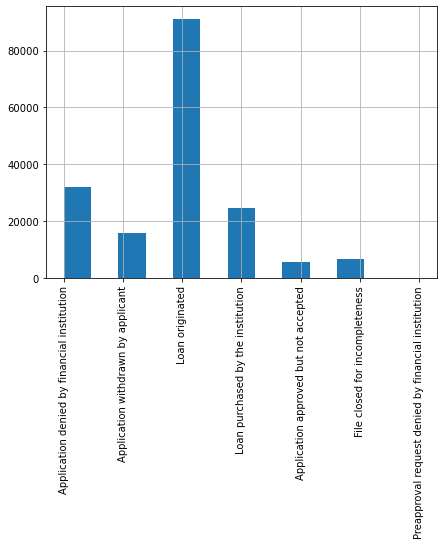

In [8]:
df.action_taken_name.hist(bins = 13, figsize = [7 , 5], xrot = 90)

<AxesSubplot:>

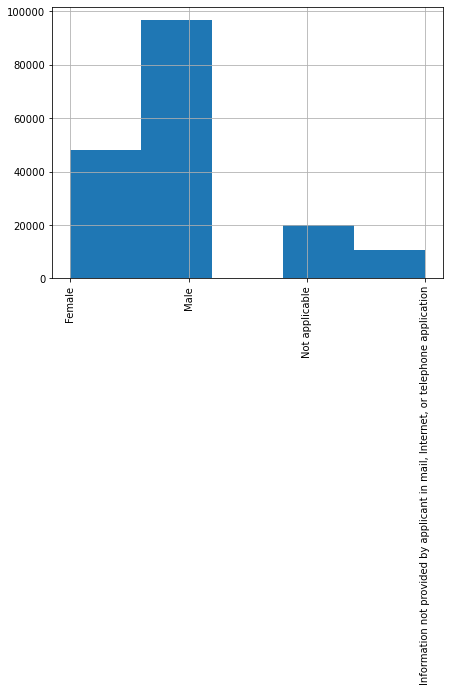

In [9]:
df.applicant_sex_name.hist(bins = 5, figsize = [7 , 5], xrot = 90)

In [124]:
loans_df = pd.DataFrame({'Null_Values': df.isna().sum().sort_values(ascending = False), 'Percentage': round((df.isna().sum())/(df.shape[0])*(100),2)})

In [125]:
df.action_taken_name.unique()

array(['Application denied by financial institution',
       'Application withdrawn by applicant', 'Loan originated',
       'Loan purchased by the institution',
       'Application approved but not accepted',
       'File closed for incompleteness',
       'Preapproval request denied by financial institution'],
      dtype=object)

In [154]:
loan = pd.DataFrame({'total_gender': df.groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'loan_approved': df.loc[df.action_taken_name == 'Loan originated'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'loan_bought': df.loc[df.action_taken_name == 'Loan purchased by the institution'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'approved_not_accepted': df.loc[df.action_taken_name == 'Application approved but not accepted'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'application_witdrawn': df.loc[df.action_taken_name == 'Application withdrawn by applicant'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'file_closed_incompleteness': df.loc[df.action_taken_name == 'File closed for incompleteness'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'loan_denied': (df.loc[(df.action_taken_name == 'Application denied by financial institution') | 
                                    (df.action_taken_name == 'Preapproval request denied by financial institution')].groupby('applicant_sex_name')['applicant_sex_name'].count())}).reset_index()

loan['loan_approved_%'] = round(loan.loan_approved / loan.total_gender * 100, 2)
loan['loan_bought_%'] = round(loan.loan_bought / loan.total_gender * 100, 2)
loan['approved_not_accepted_%'] = round(loan.approved_not_accepted / loan.total_gender * 100, 2)
loan['application_witdrawn_%'] = round(loan.application_witdrawn / loan.total_gender * 100, 2)
loan['file_closed_incompleteness_%'] = round(loan.file_closed_incompleteness / loan.total_gender * 100, 2)
loan['loan_denied_%'] = round(loan.loan_denied / loan.total_gender * 100, 2)

loan = loan[['applicant_sex_name', 'total_gender', 'loan_approved', 'loan_approved_%', 'loan_bought', 'loan_bought_%', 'approved_not_accepted', 'approved_not_accepted_%', 'application_witdrawn', 'application_witdrawn_%', 'loan_denied', 'loan_denied_%', 'file_closed_incompleteness', 'file_closed_incompleteness_%']]

loan

,applicant_sex_name,total_gender,loan_approved,loan_approved_%,loan_bought,loan_bought_%,approved_not_accepted,approved_not_accepted_%,application_witdrawn,application_witdrawn_%,loan_denied,loan_denied_%,file_closed_incompleteness,file_closed_incompleteness_%
0,Female,48030,27415,57.08,2404,5.01,1586,3.30,4559,9.49,10232,21.30,1834,3.82
1,"Information not provided by applicant in mail,...",10726,5311,49.52,104,0.97,361,3.37,1379,12.86,2833,26.41,738,6.88
2,Male,96939,56031,57.80,4965,5.12,3663,3.78,9610,9.91,18595,19.18,4075,4.20
3,Not applicable,20167,2225,11.03,17209,85.33,133,0.66,217,1.08,348,1.73,35,0.17


In [43]:

loan = pd.DataFrame(loan)
loan = loan.reset_index()
loan

,applicant_sex_name,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,...,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Female,27415,27415,27415,27415,26083,27415,27415,27415,27404,...,27415,27415,27415,27415,27402,27415,27371,27393,27401,27401
1,"Information not provided by applicant in mail,...",5311,5311,5311,5311,4849,5311,5311,5311,5311,...,5311,5311,5311,5311,5309,5311,5285,5300,5308,5308
2,Male,56031,56031,56031,56031,53442,56031,56031,56031,56007,...,56031,56031,56031,56031,56000,56031,55937,55969,55997,55997
3,Not applicable,2225,2225,2225,2225,9,2225,2225,2225,2224,...,2225,2225,2225,2225,2196,2225,2189,2179,2195,2195


In [46]:
df.loc[df.action_taken_name == 'Loan originated'].groupby('applicant_sex_name').count()

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,denial_reason_name_1,...,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
applicant_sex_name,,,,,,,,,,,,,,,,,,,,,
Female,27415,27415,27415,27415,26083,27415,27415,27415,27404,0,...,27415,27415,27415,27415,27402,27415,27371,27393,27401,27401
"Information not provided by applicant in mail, Internet, or telephone application",5311,5311,5311,5311,4849,5311,5311,5311,5311,0,...,5311,5311,5311,5311,5309,5311,5285,5300,5308,5308
Male,56031,56031,56031,56031,53442,56031,56031,56031,56007,0,...,56031,56031,56031,56031,56000,56031,55937,55969,55997,55997
Not applicable,2225,2225,2225,2225,9,2225,2225,2225,2224,0,...,2225,2225,2225,2225,2196,2225,2189,2179,2195,2195


In [19]:
df[df.action_taken_name != 'Loan originated'].groupby('applicant_sex_name')['applicant_sex_name'].count()

applicant_sex_name
Female                                                                               20615
Information not provided by applicant in mail, Internet, or telephone application     5415
Male                                                                                 40908
Not applicable                                                                       17942
Name: applicant_sex_name, dtype: int64

In [ ]:
df.loc[(df['is_canceled'] == 0) & (df['hotel'] == 'City Hotel')]['country'].value_counts().reset_index()
df.loc[(df['applicant_sex_name'] == 'Female') & 

In [10]:
for i in df.columns:
    print(df.groupby(i)[i].count())
    print('\n')

action_taken_name
Application approved but not accepted                   5743
Application denied by financial institution            32005
Application withdrawn by applicant                     15765
File closed for incompleteness                          6682
Loan originated                                        90982
Loan purchased by the institution                      24682
Preapproval request denied by financial institution        3
Name: action_taken_name, dtype: int64


agency_name
Consumer Financial Protection Bureau           70850
Department of Housing and Urban Development    60432
Federal Deposit Insurance Corporation           6174
Federal Reserve System                          4102
National Credit Union Administration           20380
Office of the Comptroller of the Currency      13924
Name: agency_name, dtype: int64


applicant_ethnicity_name
Hispanic or Latino                                                                    10015
Information not provided by applic

In [11]:
df.groupby('county_name')['county_name'].count().sort_values(ascending=False)

county_name
Suffolk County      18063
Nassau County       15431
Queens County       15142
Kings County        13436
Erie County         10134
                    ...  
Delaware County       367
Schoharie County      358
Yates County          344
Schuyler County       255
Hamilton County        91
Name: county_name, Length: 62, dtype: int64

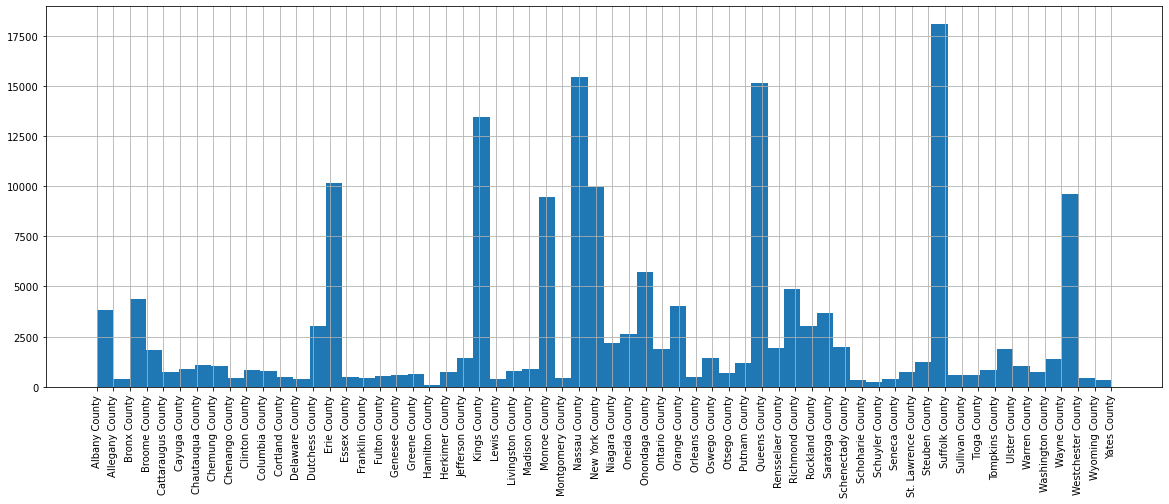

In [12]:
ax = df['county_name'].sort_values().hist(bins = pd.Series(df.county_name.unique()).count(), figsize=[20,7], xrot = 90)
plt.show()

In [ ]:
df.

In [90]:
df.columns

Index(['action_taken_name', 'agency_name', 'applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s',
       'co_applicant_ethnicity_name', 'co_applicant_race_name_1',
       'co_applicant_sex_name', 'county_name', 'denial_reason_name_1',
       'denial_reason_name_2', 'denial_reason_name_3', 'hoepa_status_name',
       'lien_status_name', 'loan_purpose_name', 'loan_type_name', 'msamd_name',
       'owner_occupancy_name', 'preapproval_name', 'property_type_name',
       'purchaser_type_name', 'hud_median_family_income', 'loan_amount_000s',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'minority_population', 'population'],
      dtype='object')

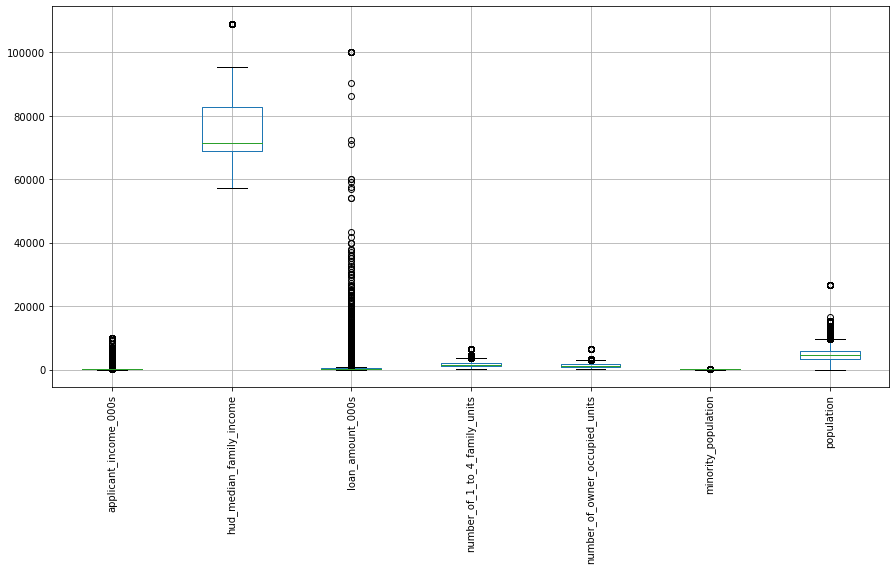

In [14]:
ax = df.boxplot(figsize=[15,7], rot = 90)
plt.show()